In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## Split the dataset

In [ ]:
cleaned_df = pd.read_csv("/content/drive/MyDrive/4995/project/project-deliverable-2/data_after_cleaning.csv")
cleaned_df.head(10)

,disc_number,explicit,track_number,album_type,album_total_tracks,acousticness,danceability,energy,key,liveness,...,tempo,valence,year,duration_min,Log_principal_artist_followers,Log_instrumentalness,markets_count,artist_count,genres_count,popularity
0,1,0.0,4,0.0,10,0.70100,0.397,0.207,0.0,0.1160,...,171.282,0.268,1986,3.793333,14.696082,-6.877517,184,1,4,73
1,1,0.0,9,0.0,13,0.01610,0.883,0.553,6.0,0.2280,...,91.753,0.578,1986,3.680667,14.774591,-6.907755,184,1,8,61
2,1,0.0,11,0.0,13,0.00203,0.914,0.586,6.0,0.0992,...,116.371,0.655,1986,2.624000,14.774591,-6.906177,184,1,8,68
3,1,0.0,9,0.0,9,0.00835,0.581,0.791,6.0,0.1420,...,123.887,0.619,1986,4.271550,15.415872,-6.849298,184,1,9,66
4,1,0.0,1,0.0,20,0.29400,0.685,0.594,2.0,0.3580,...,121.761,0.853,1986,3.069333,14.089536,-6.904072,15,1,9,63
5,1,0.0,1,0.0,10,0.10100,0.608,0.768,1.0,0.0942,...,132.699,0.748,1986,3.519333,13.645847,-6.906346,184,1,8,72
6,1,0.0,6,0.0,10,0.07040,0.401,0.901,1.0,0.5380,...,134.799,0.839,1986,3.222000,15.297645,-6.907755,184,1,5,74
7,1,0.0,1,0.0,8,0.04270,0.696,0.780,5.0,0.2980,...,98.699,0.954,1986,5.858433,13.814092,-1.897120,184,1,7,67
8,1,0.0,1,0.0,8,0.18600,0.617,0.931,0.0,0.1710,...,131.014,0.849,1986,3.467100,14.947869,-5.929429,183,1,9,65
9,1,0.0,1,0.0,9,0.00658,0.913,0.596,11.0,0.0780,...,127.215,0.973,1986,4.535550,13.535629,-5.405903,184,1,6,71


In [ ]:
df_X = cleaned_df.drop(columns=['popularity'])
df_Y = cleaned_df['popularity'].astype(int)

X_train, X_test, y_train, y_test = train_test_split(df_X, df_Y, test_size=0.2, random_state=42)
print(f"Shape of training data: {X_train.shape}")
print(f"Shape of test data: {X_test.shape}")

Shape of training data: (9061, 22)
Shape of test data: (2266, 22)


## Standardize data

In [ ]:
scaler=StandardScaler()

X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

## Decision tree

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Create and train the Decision Tree regressor
regressor = DecisionTreeRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error (MSE): 69.72120476610768
Coefficient of Determination (R-squared): 0.19197554969833375


In [ ]:
print("predictions for the first ten test data: ", y_pred[:10])
print("real labels for the first ten test data: ", y_test.tolist()[:10])

predictions for the first ten test data:  [70. 77. 82. 65. 69. 65. 69. 61. 73. 66.]
real labels for the first ten test data:  [65, 72, 74, 73, 84, 75, 62, 61, 72, 63]


#### Visualization

In [ ]:
from sklearn.tree import plot_tree

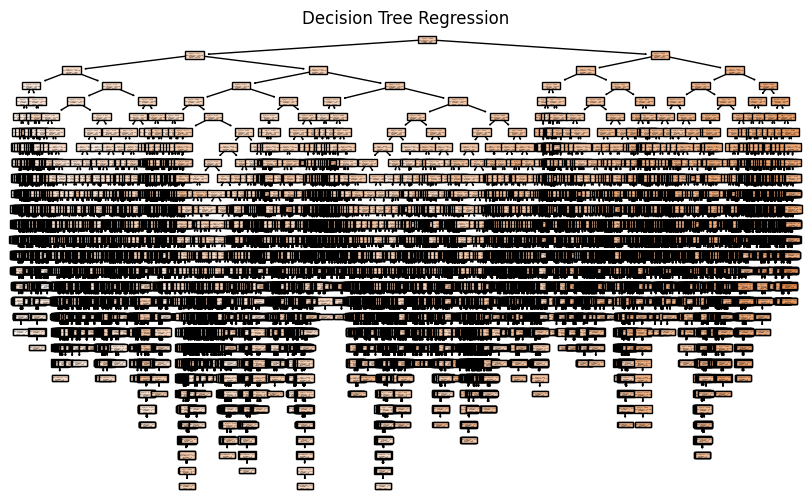

In [ ]:
# Visualize the trained Decision Tree
plt.figure(figsize=(30, 30))
plot_tree(regressor, filled=True)
plt.title("Decision Tree Regression")
plt.show()

#### Feature importance

In [ ]:
importances = regressor.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': df_X.columns, 'Importance': importances})
# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
# Display the top 3 most important features
# top_features = feature_importances_df.head(3)
print(feature_importances_df)

                           Feature  Importance
15                            year    0.496005
17  Log_principal_artist_followers    0.087172
19                   markets_count    0.044240
16                    duration_min    0.038544
9                         liveness    0.035367
13                           tempo    0.033433
5                     acousticness    0.029526
14                         valence    0.029423
12                     speechiness    0.028460
7                           energy    0.027648
6                     danceability    0.027166
10                        loudness    0.027010
18            Log_instrumentalness    0.021194
2                     track_number    0.018306
4               album_total_tracks    0.017046
8                              key    0.014241
21                    genres_count    0.012871
11                            mode    0.003163
3                       album_type    0.003124
1                         explicit    0.003095
20           

## Random forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Create and train the Random Forest regressor
regressor = RandomForestRegressor(random_state=42)
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error (MSE): 36.938289617403726
Coefficient of Determination (R-squared): 0.5719087003256231


In [ ]:
print("predictions for the first ten test data: ", y_pred[:10])
print("real labels for the first ten test data: ", y_test.tolist()[:10])

predictions for the first ten test data:  [72.75 75.6  79.13 62.99 78.13 69.36 66.27 61.57 67.55 66.64]
real labels for the first ten test data:  [65, 72, 74, 73, 84, 75, 62, 61, 72, 63]


#### Feature importance

In [ ]:
importances = regressor.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': df_X.columns, 'Importance': importances})
# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
# Display the top 3 most important features
# top_features = feature_importances_df.head(3)
print(feature_importances_df)

                           Feature  Importance
15                            year    0.496152
17  Log_principal_artist_followers    0.085906
19                   markets_count    0.041933
12                     speechiness    0.036712
16                    duration_min    0.032225
6                     danceability    0.031328
9                         liveness    0.030789
13                           tempo    0.030788
14                         valence    0.030171
10                        loudness    0.029473
5                     acousticness    0.027504
7                           energy    0.026563
18            Log_instrumentalness    0.020892
4               album_total_tracks    0.018632
2                     track_number    0.018596
8                              key    0.017414
21                    genres_count    0.012944
11                            mode    0.003768
20                    artist_count    0.003085
1                         explicit    0.002807
3            

## Linear regression

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

# Make predictions on the test set
y_pred = regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)

Mean Squared Error (MSE): 41.247452073793134
Coefficient of Determination (R-squared): 0.5219682462447547


In [ ]:
print("predictions for the first ten test data: ", y_pred[:10])
print("real labels for the first ten test data: ", y_test.tolist()[:10])

predictions for the first ten test data:  [73.61621368 75.14240509 79.96196164 64.26954963 75.53444928 70.48304743
 64.53864041 63.07160875 68.33096416 66.69971811]
real labels for the first ten test data:  [65, 72, 74, 73, 84, 75, 62, 61, 72, 63]


#### Feature importance

In [ ]:
# importances = regressor.feature_importances_
# Get the feature importance (coefficients)
feature_importance = np.abs(regressor.coef_)

# Normalize the feature importance
importances /= np.max(feature_importance)

feature_importances_df = pd.DataFrame({'Feature': df_X.columns, 'Importance': importances})
# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
# Display the top 3 most important features
# top_features = feature_importances_df.head(3)
print(feature_importances_df)

                           Feature  Importance
15                            year    0.094743
17  Log_principal_artist_followers    0.016404
19                   markets_count    0.008007
12                     speechiness    0.007010
16                    duration_min    0.006154
6                     danceability    0.005982
9                         liveness    0.005879
13                           tempo    0.005879
14                         valence    0.005761
10                        loudness    0.005628
5                     acousticness    0.005252
7                           energy    0.005072
18            Log_instrumentalness    0.003989
4               album_total_tracks    0.003558
2                     track_number    0.003551
8                              key    0.003325
21                    genres_count    0.002472
11                            mode    0.000720
20                    artist_count    0.000589
1                         explicit    0.000536
3            

## SVM

In [ ]:
from sklearn.svm import SVR

#### linear kernel

In [ ]:
regressor = SVR(kernel='linear')
regressor.fit(X_train, y_train)
# Make predictions on the test set
y_pred = regressor.predict(X_test)
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)

print("predictions for the first ten test data: ", y_pred[:10])
print("real labels for the first ten test data: ", y_test.tolist()[:10])

Mean Squared Error (MSE): 42.41292510201552
Coefficient of Determination (R-squared): 0.5084611545912181
predictions for the first ten test data:  [72.75019145 74.75655579 80.31059703 63.48696164 75.05338571 70.2457487
 63.69799679 62.218584   67.46377095 65.90994144]
real labels for the first ten test data:  [65, 72, 74, 73, 84, 75, 62, 61, 72, 63]


In [ ]:
coefficients = regressor.coef_[0]
importances = coefficients

feature_importances_df = pd.DataFrame({'Feature': df_X.columns, 'Importance': importances})
# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
# Display the top 3 most important features
# top_features = feature_importances_df.head(3)
print(feature_importances_df)

                           Feature  Importance
15                            year    5.460226
17  Log_principal_artist_followers    2.266351
19                   markets_count    2.000834
3                       album_type    0.415480
6                     danceability    0.369284
20                    artist_count    0.233864
5                     acousticness    0.160136
7                           energy    0.048401
4               album_total_tracks    0.027563
0                      disc_number   -0.004977
13                           tempo   -0.005341
14                         valence   -0.007162
18            Log_instrumentalness   -0.087773
10                        loudness   -0.100817
8                              key   -0.145778
9                         liveness   -0.145801
16                    duration_min   -0.169757
1                         explicit   -0.254457
11                            mode   -0.272535
2                     track_number   -0.320716
12           

#### rbf kernel

In [ ]:
regressor = SVR(kernel='rbf')
regressor.fit(X_train, y_train)
# Make predictions on the test set
y_pred = regressor.predict(X_test)
# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print("Mean Squared Error (MSE):", mse)
print("Coefficient of Determination (R-squared):", r2)

print("predictions for the first ten test data: ", y_pred[:10])
print("real labels for the first ten test data: ", y_test.tolist()[:10])

Mean Squared Error (MSE): 41.609555744632544
Coefficient of Determination (R-squared): 0.5177716948431579
predictions for the first ten test data:  [72.47592078 76.67178031 77.53935184 64.09277326 74.4300045  70.44261712
 63.09849247 63.04488836 67.09005584 66.21531389]
real labels for the first ten test data:  [65, 72, 74, 73, 84, 75, 62, 61, 72, 63]


In [ ]:
# Retrieve the indices of the support vectors
support_vector_indices = regressor.support_
# Retrieve the support vectors and feature names
support_vectors = regressor.support_vectors_

average_values = np.mean(support_vectors, axis=0)

importances = average_values

feature_importances_df = pd.DataFrame({'Feature': df_X.columns, 'Importance': importances})
# Sort the DataFrame by importance in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)
# Display the top 3 most important features
# top_features = feature_importances_df.head(3)
print(feature_importances_df)

                           Feature  Importance
21                    genres_count    0.003004
7                           energy    0.002621
16                    duration_min    0.001622
18            Log_instrumentalness    0.001286
10                        loudness    0.001228
4               album_total_tracks    0.001097
0                      disc_number    0.001042
17  Log_principal_artist_followers    0.000832
13                           tempo    0.000746
14                         valence    0.000640
8                              key    0.000454
2                     track_number    0.000095
9                         liveness   -0.000026
12                     speechiness   -0.000088
19                   markets_count   -0.000126
15                            year   -0.000997
6                     danceability   -0.001235
3                       album_type   -0.001533
11                            mode   -0.001585
1                         explicit   -0.001837
20           